In [1]:
#dependencies
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

Using TensorFlow backend.


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#shape of data
df.shape

(303, 14)

In [4]:
#columns that I will keep
columns_to_retain = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang','oldpeak','slope','ca','thal','target']

#after droping unnecessary columns, new dataset
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)

#drop the rows with missing values
df = df.dropna(axis=0)

In [5]:
#transform the non-numeric data in the columns into number
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#after cleaning the dataset(Here, htn value 1 means yes. But classification value 0 means disease detected)
df.head()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,31,64,1,0,49,0,2.3,0,0,1,1
1,2,22,80,0,1,84,0,3.5,0,0,2,1
2,1,22,35,0,0,71,0,1.4,2,0,2,1
3,1,14,67,0,1,76,0,0.8,2,0,2,1
4,0,14,145,0,1,62,1,0.6,2,0,2,1


In [7]:
#splitting the dataset into independant (x) data set for the features and dependant (y) dataset for the target
x = df.drop(['target'], axis=1)
y = df['target']

In [8]:
#scaling the dataset to bring all the values between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

In [9]:
#split data into train, test and shuffle
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [10]:
#building model
model = Sequential()
model.add(Dense(256, input_dim = len(x.columns), kernel_initializer=k.initializers.random_normal(seed=13),activation='relu'))
model.add(Dense(1, activation = 'hard_sigmoid'))

In [11]:
#compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [12]:
#train the model
history = model.fit(x_train, y_train, epochs = 1000, batch_size = x_train.shape[0])

Epoch 1/1000
242/242 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5083
Epoch 2/1000
242/242 [==============================] - 0s 8us/step - loss: 0.6886 - accuracy: 0.5083
Epoch 3/1000
242/242 [==============================] - 0s 8us/step - loss: 0.6826 - accuracy: 0.5207
Epoch 4/1000
242/242 [==============================] - 0s 8us/step - loss: 0.6768 - accuracy: 0.5785
Epoch 5/1000
242/242 [==============================] - 0s 8us/step - loss: 0.6710 - accuracy: 0.6901
Epoch 6/1000
242/242 [==============================] - 0s 8us/step - loss: 0.6653 - accuracy: 0.7314
Epoch 7/1000
242/242 [==============================] - 0s 8us/step - loss: 0.6597 - accuracy: 0.7645
Epoch 8/1000
242/242 [==============================] - 0s 8us/step - loss: 0.6542 - accuracy: 0.7686
Epoch 9/1000
242/242 [==============================] - 0s 12us/step - loss: 0.6488 - accuracy: 0.7727
Epoch 10/1000
242/242 [==============================] - 0s 8us/step - loss: 0.64

Epoch 81/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3959 - accuracy: 0.8017
Epoch 82/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3955 - accuracy: 0.8017
Epoch 83/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3951 - accuracy: 0.8017
Epoch 84/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3947 - accuracy: 0.8017
Epoch 85/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3943 - accuracy: 0.8017
Epoch 86/1000
242/242 [==============================] - 0s 4us/step - loss: 0.3940 - accuracy: 0.8017
Epoch 87/1000
242/242 [==============================] - 0s 4us/step - loss: 0.3937 - accuracy: 0.8017
Epoch 88/1000
242/242 [==============================] - 0s 12us/step - loss: 0.3934 - accuracy: 0.8017
Epoch 89/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3931 - accuracy: 0.8017
Epoch 90/1000
242/242 [==============================] - 0s 8us/step - l

Epoch 160/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3742 - accuracy: 0.8140
Epoch 161/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3739 - accuracy: 0.8140
Epoch 162/1000
242/242 [==============================] - 0s 4us/step - loss: 0.3736 - accuracy: 0.8140
Epoch 163/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3732 - accuracy: 0.8140
Epoch 164/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3729 - accuracy: 0.8140
Epoch 165/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3726 - accuracy: 0.8140
Epoch 166/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3723 - accuracy: 0.8140
Epoch 167/1000
242/242 [==============================] - 0s 4us/step - loss: 0.3720 - accuracy: 0.8182
Epoch 168/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3717 - accuracy: 0.8140
Epoch 169/1000
242/242 [==============================] - 0s 8us

Epoch 239/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3459 - accuracy: 0.8264
Epoch 240/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3455 - accuracy: 0.8264
Epoch 241/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3451 - accuracy: 0.8264
Epoch 242/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3447 - accuracy: 0.8264
Epoch 243/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3443 - accuracy: 0.8264
Epoch 244/1000
242/242 [==============================] - 0s 4us/step - loss: 0.3439 - accuracy: 0.8264
Epoch 245/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3434 - accuracy: 0.8264
Epoch 246/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3430 - accuracy: 0.8264
Epoch 247/1000
242/242 [==============================] - 0s 17us/step - loss: 0.3426 - accuracy: 0.8264
Epoch 248/1000
242/242 [==============================] - 0s 8u

Epoch 318/1000
242/242 [==============================] - 0s 4us/step - loss: 0.3130 - accuracy: 0.8388
Epoch 319/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3126 - accuracy: 0.8388
Epoch 320/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3122 - accuracy: 0.8388
Epoch 321/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3118 - accuracy: 0.8388
Epoch 322/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3114 - accuracy: 0.8388
Epoch 323/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3109 - accuracy: 0.8388
Epoch 324/1000
242/242 [==============================] - 0s 4us/step - loss: 0.3105 - accuracy: 0.8388
Epoch 325/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3101 - accuracy: 0.8388
Epoch 326/1000
242/242 [==============================] - 0s 8us/step - loss: 0.3097 - accuracy: 0.8388
Epoch 327/1000
242/242 [==============================] - 0s 8us

Epoch 397/1000
242/242 [==============================] - 0s 4us/step - loss: 0.2785 - accuracy: 0.8636
Epoch 398/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2781 - accuracy: 0.8678
Epoch 399/1000
242/242 [==============================] - 0s 4us/step - loss: 0.2776 - accuracy: 0.8636
Epoch 400/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2772 - accuracy: 0.8636
Epoch 401/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2767 - accuracy: 0.8636
Epoch 402/1000
242/242 [==============================] - 0s 4us/step - loss: 0.2763 - accuracy: 0.8636
Epoch 403/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2758 - accuracy: 0.8636
Epoch 404/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2753 - accuracy: 0.8678
Epoch 405/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2749 - accuracy: 0.8678
Epoch 406/1000
242/242 [==============================] - 0s 8us

Epoch 476/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2461 - accuracy: 0.8843
Epoch 477/1000
242/242 [==============================] - 0s 13us/step - loss: 0.2457 - accuracy: 0.8843
Epoch 478/1000
242/242 [==============================] - 0s 4us/step - loss: 0.2453 - accuracy: 0.8843
Epoch 479/1000
242/242 [==============================] - 0s 4us/step - loss: 0.2449 - accuracy: 0.8843
Epoch 480/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2446 - accuracy: 0.8843
Epoch 481/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2442 - accuracy: 0.8843
Epoch 482/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2438 - accuracy: 0.8843
Epoch 483/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2434 - accuracy: 0.8843
Epoch 484/1000
242/242 [==============================] - 0s 4us/step - loss: 0.2430 - accuracy: 0.8843
Epoch 485/1000
242/242 [==============================] - 0s 8u

Epoch 555/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2171 - accuracy: 0.8884
Epoch 556/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2168 - accuracy: 0.8884
Epoch 557/1000
242/242 [==============================] - 0s 4us/step - loss: 0.2165 - accuracy: 0.8884
Epoch 558/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2161 - accuracy: 0.8884
Epoch 559/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2158 - accuracy: 0.8884
Epoch 560/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2154 - accuracy: 0.8884
Epoch 561/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2151 - accuracy: 0.8884
Epoch 562/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2147 - accuracy: 0.8884
Epoch 563/1000
242/242 [==============================] - 0s 8us/step - loss: 0.2144 - accuracy: 0.8884
Epoch 564/1000
242/242 [==============================] - 0s 8us

Epoch 634/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1922 - accuracy: 0.9174
Epoch 635/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1919 - accuracy: 0.9174
Epoch 636/1000
242/242 [==============================] - 0s 12us/step - loss: 0.1915 - accuracy: 0.9174
Epoch 637/1000
242/242 [==============================] - 0s 4us/step - loss: 0.1913 - accuracy: 0.9174
Epoch 638/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1910 - accuracy: 0.9174
Epoch 639/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1907 - accuracy: 0.9174
Epoch 640/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1904 - accuracy: 0.9174
Epoch 641/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1901 - accuracy: 0.9174
Epoch 642/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1898 - accuracy: 0.9174
Epoch 643/1000
242/242 [==============================] - 0s 8u

Epoch 713/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1707 - accuracy: 0.9256
Epoch 714/1000
242/242 [==============================] - 0s 4us/step - loss: 0.1704 - accuracy: 0.9256
Epoch 715/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1701 - accuracy: 0.9256
Epoch 716/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1699 - accuracy: 0.9256
Epoch 717/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1696 - accuracy: 0.9256
Epoch 718/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1693 - accuracy: 0.9256
Epoch 719/1000
242/242 [==============================] - 0s 4us/step - loss: 0.1691 - accuracy: 0.9256
Epoch 720/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1688 - accuracy: 0.9256
Epoch 721/1000
242/242 [==============================] - 0s 12us/step - loss: 0.1686 - accuracy: 0.9256
Epoch 722/1000
242/242 [==============================] - 0s 8u

Epoch 792/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1515 - accuracy: 0.9421
Epoch 793/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1513 - accuracy: 0.9421
Epoch 794/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1511 - accuracy: 0.9421
Epoch 795/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1509 - accuracy: 0.9421
Epoch 796/1000
242/242 [==============================] - 0s 12us/step - loss: 0.1506 - accuracy: 0.9421
Epoch 797/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1504 - accuracy: 0.9421
Epoch 798/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1502 - accuracy: 0.9421
Epoch 799/1000
242/242 [==============================] - 0s 12us/step - loss: 0.1499 - accuracy: 0.9421
Epoch 800/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1497 - accuracy: 0.9421
Epoch 801/1000
242/242 [==============================] - 0s 1

Epoch 871/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1354 - accuracy: 0.9463
Epoch 872/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1356 - accuracy: 0.9463
Epoch 873/1000
242/242 [==============================] - 0s 4us/step - loss: 0.1351 - accuracy: 0.9463
Epoch 874/1000
242/242 [==============================] - 0s 4us/step - loss: 0.1350 - accuracy: 0.9463
Epoch 875/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1348 - accuracy: 0.9463
Epoch 876/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1346 - accuracy: 0.9463
Epoch 877/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1345 - accuracy: 0.9463
Epoch 878/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1342 - accuracy: 0.9463
Epoch 879/1000
242/242 [==============================] - 0s 4us/step - loss: 0.1341 - accuracy: 0.9463
Epoch 880/1000
242/242 [==============================] - 0s 12u

Epoch 950/1000
242/242 [==============================] - 0s 4us/step - loss: 0.1230 - accuracy: 0.9463
Epoch 951/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1228 - accuracy: 0.9463
Epoch 952/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1228 - accuracy: 0.9463
Epoch 953/1000
242/242 [==============================] - 0s 12us/step - loss: 0.1227 - accuracy: 0.9463
Epoch 954/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1224 - accuracy: 0.9463
Epoch 955/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1225 - accuracy: 0.9504
Epoch 956/1000
242/242 [==============================] - 0s 12us/step - loss: 0.1221 - accuracy: 0.9463
Epoch 957/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1222 - accuracy: 0.9463
Epoch 958/1000
242/242 [==============================] - 0s 8us/step - loss: 0.1219 - accuracy: 0.9504
Epoch 959/1000
242/242 [==============================] - 0s 1

In [13]:
#save the model
#model.save('ckd.model')

Text(0.5, 0, 'epoch')

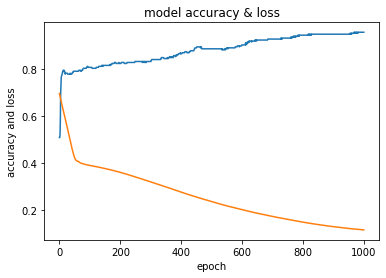

In [14]:
#visualize the models loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [15]:
#Shape of training and testing data
print('shape of train data:', x_train.shape)
print('shape of test data:', x_test.shape)

shape of train data: (242, 11)
shape of test data: (61, 11)


In [16]:
#Showing the actual and predicted values
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred

print('Original: {0}'.format(",".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(",".join(str(x) for x in pred)))

Original: 1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1
Predicted: 1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1
